In [1]:
import tushare as ts
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

TuShare Token

In [2]:
ts.set_token('bb041845ae29bf5ae6414c14685c2da18f03f955c1d39d9f4ab6b947')

In [3]:
pro = ts.pro_api()

Read the excel table. Here we adopt the simplest strategy and change every season. <br>
For instance, we assume to have this data $1$ week after the end of each season.For 2020, we have $4$ seasons' information coming at the time<br> 
&emsp; $2020/03/31 + 7$ days<br>
&emsp; $2020/06/30 + 7$ days<br>
&emsp; $2020/09/30 + 7$ days<br>
&emsp; $2020/12/31 + 7$ days<br>
Then we will purchase and hold the position until the next information came out<br>
&emsp; $2020/06/30 + 7$ days<br>
&emsp; $2020/09/30 + 7$ days<br>
&emsp; $2020/12/31 + 7$ days<br>
&emsp; $2021/03/31 + 7$ days<br>
We set the starting amount to be $1M$. <br>

In [13]:
Season1 = pd.read_excel("/Users/zhangluyang/Desktop/QuantProject/Season1.xlsx")
Season2 = pd.read_excel("/Users/zhangluyang/Desktop/QuantProject/Season2.xlsx")
Season3 = pd.read_excel("/Users/zhangluyang/Desktop/QuantProject/Season3.xlsx")
Season4 = pd.read_excel("/Users/zhangluyang/Desktop/QuantProject/Season4.xlsx")

Season1['Weigth'] = Season1['Number']/sum(Season1['Number'])
Season2['Weigth'] = Season2['Number']/sum(Season2['Number'])
Season3['Weigth'] = Season3['Number']/sum(Season3['Number'])
Season4['Weigth'] = Season4['Number']/sum(Season4['Number'])

timeListStart = ['20200407', '20200707', '20201007', '20210107']
timeListEnd = ['20200707', '20201007', '20210107', '20210407']

In [95]:
df = pro.index_daily(ts_code='1B0300.SH', start_date='20200407', end_date='20200707')

Exception: 抱歉，您没有访问该接口的权限，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。

In [88]:
# to begin with, we start to build the position with the first position
# we have 61 days
portfolio = []
tickStart = Season1['Tick']
tick = tickStart[0]
num = len(ts.pro_bar(ts_code=tick, adj='qfq', start_date='20200407', end_date='20200707'))
temp = np.array([0 for x in range(num)])
for i in range(len(Season1)):
    tick = tickStart[i]
    df_info = ts.pro_bar(ts_code=tick, adj='qfq', start_date='20200407', end_date='20200707')
    df_info = df_info[::-1].reset_index()
    price = df_info['close']
    #plt.plot([x for x in range(len(df_info))],price)
    #plt.title(tick+" 20200407 20200707")
    #plt.show()
    share = Season1.loc[i,'Weigth']/price[0]
    value = np.array(price*share)
    len1 = len(value)
    while len1 < num:
        value = np.append(value, np.mean(value))
        len1 += 1
    temp = temp + value
endingP = temp[-1]
portfolio.extend(temp)
print(temp)

tickStart = Season2['Tick']
tick = tickStart[0]
num = len(ts.pro_bar(ts_code=tick, adj='qfq', start_date='20200707', end_date='20201007'))
temp = np.array([0 for x in range(num)])
for i in range(len(Season2)):
    tick = tickStart[i]
    df_info = ts.pro_bar(ts_code=tick, adj='qfq', start_date='20200707', end_date='20201007')
    df_info = df_info[::-1].reset_index()
    price = df_info['close']
    #plt.plot([x for x in range(len(df_info))],price)
    #plt.title(tick+" 20200707 20200707")
    #plt.show()
    share = endingP*Season2.loc[i,'Weigth']/price[0]
    value = np.array(price*share)
    len1 = len(value)
    while len1 < num:
        value = np.append(value, np.mean(value))
        len1 += 1
    temp = temp + value
endingP = temp[-1]
portfolio.extend(temp)
print(temp)

tickStart = Season3['Tick']
tick = tickStart[0]
num = len(ts.pro_bar(ts_code=tick, adj='qfq', start_date='20201007', end_date='20210107'))
temp = np.array([0 for x in range(num)])
for i in range(len(Season3)):
    tick = tickStart[i]
    df_info = ts.pro_bar(ts_code=tick, adj='qfq', start_date='20201007', end_date='20210107')
    df_info = df_info[::-1].reset_index()
    price = df_info['close']
    #plt.plot([x for x in range(len(df_info))],price)
    #plt.title(tick+" 20201007 20210107")
    #plt.show()
    share = endingP*Season3.loc[i,'Weigth']/price[0]
    value = np.array(price*share)
    len1 = len(value)
    while len1 < num:
        value = np.append(value, np.mean(value))
        len1 += 1
    temp = temp + value
endingP = temp[-1]
portfolio.extend(temp)
print(temp)

tickStart = Season4['Tick']
tick = tickStart[0]
num = len(ts.pro_bar(ts_code=tick, adj='qfq', start_date='20210107', end_date='20210407'))
temp = np.array([0 for x in range(num)])
for i in range(len(Season4)):
    tick = tickStart[i]
    df_info = ts.pro_bar(ts_code=tick, adj='qfq', start_date='20210107', end_date='20210407')
    df_info = df_info[::-1].reset_index()
    price = df_info['close']
    #plt.plot([x for x in range(len(df_info))],price)
    #plt.title(tick+" 20210107 20210407")
    #plt.show()
    share = endingP*Season4.loc[i,'Weigth']/price[0]
    value = np.array(price*share)
    len1 = len(value)
    while len1 < num:
        value = np.append(value, np.mean(value))
        len1 += 1
    temp = temp + value
endingP = temp[-1]
portfolio.extend(temp)
print(temp)

[1.         0.99108024 1.0347836  1.01788327 1.02632812 1.04297488
 1.03330996 1.03723549 1.03666894 1.06230401 1.05657563 1.07795961
 1.07543279 1.05344699 1.08012256 1.09857459 1.06848935 1.05802009
 1.06842148 1.07174207 1.07780453 1.05923179 1.08573669 1.10882776
 1.10495876 1.09506751 1.11812064 1.12451739 1.10669728 1.11828792
 1.08816028 1.10232043 1.13517241 1.10455627 1.10176963 1.14061582
 1.15636654 1.13931819 1.15558485 1.17368089 1.18351961 1.16394025
 1.18224092 1.2018378  1.1958267  1.21638554 1.22034786 1.24470329
 1.26066349 1.24427638 1.29693639 1.30999354 1.35277448 1.3479275
 1.37463262 1.39388124 1.36351779 1.33707715 1.36347958 1.34445645
 1.37007649]
[1.37007649 1.37523931 1.43486526 1.45193732 1.51008237 1.5066487
 1.53518239 1.45712605 1.48958726 1.46537748 1.54036032 1.56679591
 1.61685721 1.51480438 1.52852787 1.54012664 1.59470587 1.58289501
 1.60074723 1.6081047  1.59918555 1.62015366 1.58167293 1.55046106
 1.55646072 1.54405153 1.48886589 1.45686993 1.4721

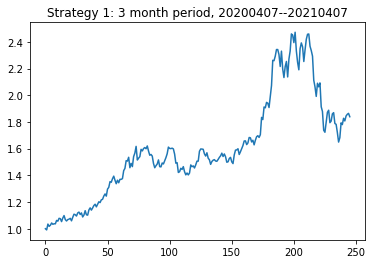

In [97]:
plt.plot([x for x in range(246)], portfolio)
plt.title('Strategy 1: 3 month period, 20200407--20210407')
plt.show()

In [86]:
portfolio

[0.7324537223198376,
 0.7262003518913398,
 0.7575279143456133,
 0.7446368330815588,
 0.7498745839567614,
 0.7615275542512838,
 0.7550811963058218,
 0.7576743398865042,
 0.7575715704161821,
 0.7768379051435059,
 0.7732500809548618,
 0.7881882430200259,
 0.7861112248287524,
 0.7697349217196179,
 0.7883935867452962,
 0.8014083797898339,
 0.7796471498874964,
 0.7717455912683888,
 0.7791609216814025,
 0.7818323418417327,
 0.7863766518217171,
 0.7723671047587298,
 0.7911400490326321,
 0.8078975505273983,
 0.8051798644891052,
 0.7975376538506478,
 0.8139217626960807,
 0.8188450449030323,
 0.8056408255039202,
 0.8154949321490674,
 0.7936020234475588,
 0.8042337961203126,
 0.8276024640804934,
 0.8053688949107706,
 0.8029430002870669,
 0.8307327061272806,
 0.8416090624993088,
 0.8289375778049004,
 0.840686260969337,
 0.8535605970384101,
 0.8604563606764045,
 0.8464147524280837,
 0.8593140829750561,
 0.8730219487972043,
 0.8685401565769634,
 0.8831507285600786,
 0.8862259735809314,
 0.90424009904

In [44]:
temp

array([1.        , 0.97222444, 0.98689826, 0.96763847, 0.98899439,
       1.0096215 , 0.99542293, 0.97874799, 0.98360178, 0.95042593,
       0.94224068, 0.90006981, 0.91409593, 0.90389   , 0.8846996 ,
       0.88348427, 0.8680456 , 0.87375502, 0.85792845, 0.92755886,
       0.94481701, 0.93470281, 0.97060085, 0.95900039, 0.9738908 ,
       0.95833385, 0.92641738, 0.94768319, 0.97498046, 0.94566345,
       0.94566056, 0.97378457, 0.95970273, 0.97766145, 0.9716207 ,
       0.94968958, 0.96047591, 0.96311124, 0.93971694, 0.91823906,
       0.93555084, 0.92847013, 0.92418694, 0.91474891, 0.92561404,
       0.94778935, 0.93322   , 0.91027993, 0.92950753, 0.93122743,
       0.91252238, 0.91681074, 0.89535293, 0.89655468, 0.89440616,
       0.90133433, 0.88972975, 0.88113523, 0.89492638, 0.86124161,
       0.8734769 ])

In [69]:
df = pd.DataFrame() 
for i in range(len(ticker_list)):
    print("{}/{}".format(i+1, len(ticker_list)), ticker_list[i])
    df2=pro.daily(ts_code=ticker_list[i], start_date='20190101', end_date=today_date)
    #df2 = df1[["ts_code", "trade_date", "close", "vol", "amount"]]
    df2.columns = pd.MultiIndex.from_product([[df2.iloc[0,0]], df2.columns])
    df = pd.concat([df, df2], axis=1)

1/34 300750.SZ
2/34 600438.SH
3/34 601012.SH
4/34 002460.SZ
5/34 300037.SZ
6/34 300014.SZ
7/34 603659.SH
8/34 002050.SZ
9/34 300073.SZ
10/34 002459.SZ
11/34 002594.SZ
12/34 002812.SZ
13/34 600031.SH
14/34 002709.SZ
15/34 300274.SZ
16/34 300118.SZ
17/34 300751.SZ
18/34 002497.SZ
19/34 300724.SZ
20/34 600546.SH
21/34 002074.SZ
22/34 603396.SH
23/34 000049.SZ
24/34 002850.SZ
25/34 603179.SH
26/34 002271.SZ
27/34 600309.SH
28/34 600176.SH
29/34 002601.SZ
30/34 600699.SH
31/34 601689.SH
32/34 600809.SH
33/34 601888.SH
34/34 000858.SZ


In [70]:
df = df.iloc[::-1]
df = df.reset_index(drop=True)

/Users/zhangluyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


300750.SZ 28.07748676122077 126.4109513742072
600438.SH 2.184221644198033 16.60126849894292
601012.SH nan nan
002460.SZ 7.208057121687774 39.05408033826638
300037.SZ 8.364469979328323 38.812536997885836
300014.SZ 6.195240763821306 44.11727272727273
603659.SH 7.8780401731957586 73.41731501057082
002050.SZ 1.2712587191786648 17.37792811839324
300073.SZ nan nan
002459.SZ nan nan
002594.SZ 16.978944272163474 68.75380549682875
002812.SZ 7.093329699614128 58.03727272727273
600031.SH 1.6731730543538612 16.963594080338268
002709.SZ 7.955951773261002 30.567906976744183
300274.SZ 6.31522763407347 15.354334038054969
300118.SZ 0.7243557337424326 13.030591966173363
300751.SZ 52.19748116026673 213.72260042283295
002497.SZ 0.684202642294421 8.386575052854123
300724.SZ 14.827804141389816 55.76515856236786
600546.SH 1.1956024709491386 8.053044397463001
002074.SZ nan nan
603396.SH 2.4830752087134846 27.627124735729385
000049.SZ 2.217995922300896 40.62496828752643
002850.SZ 9.420278769322616 44.506384778

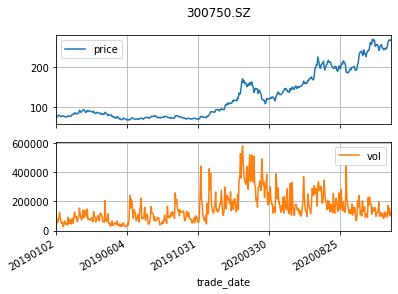

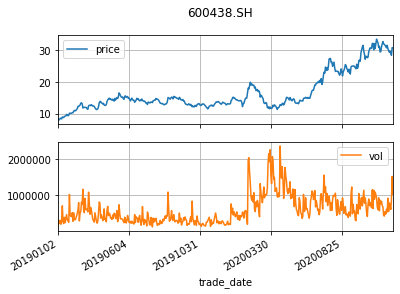

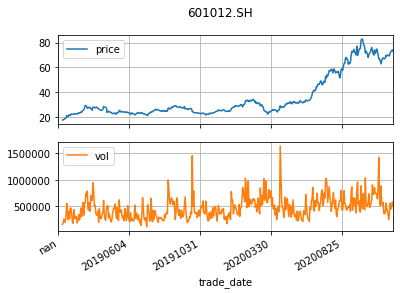

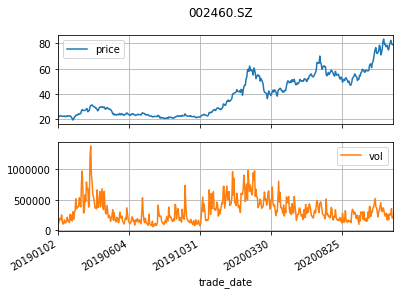

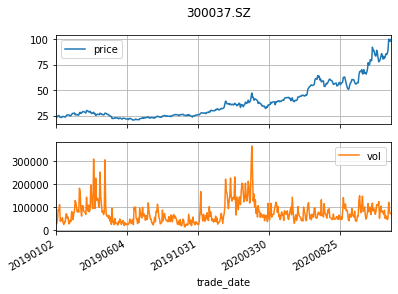

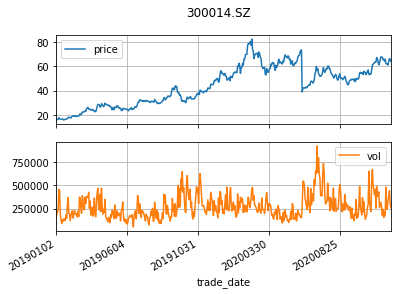

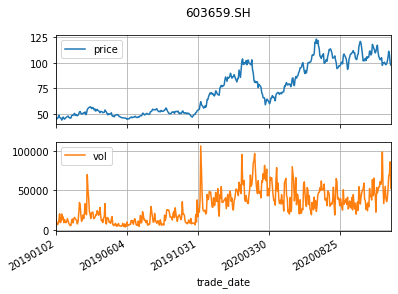

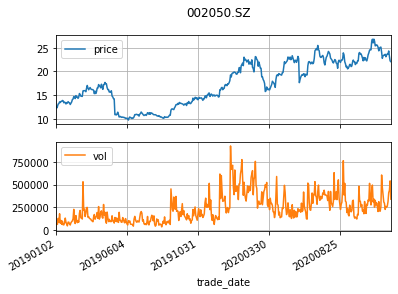

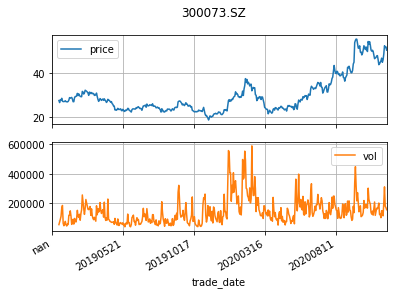

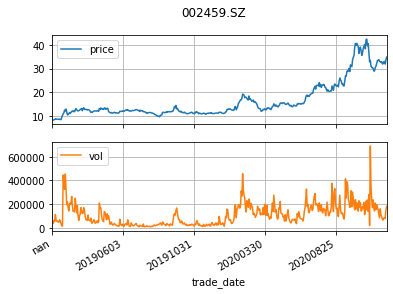

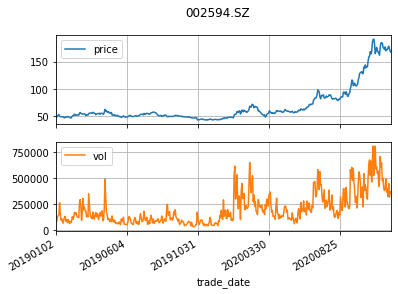

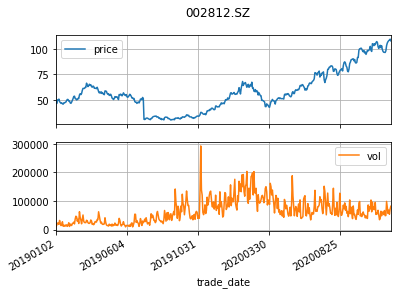

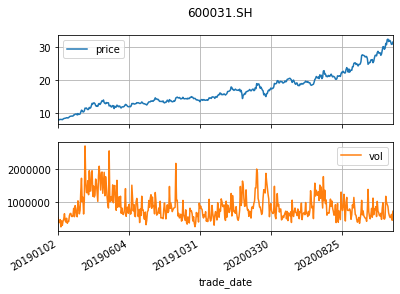

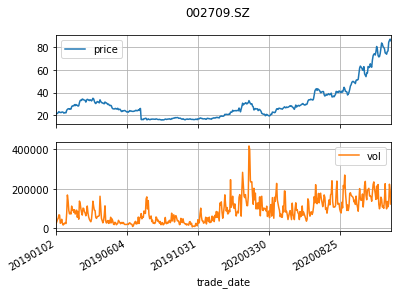

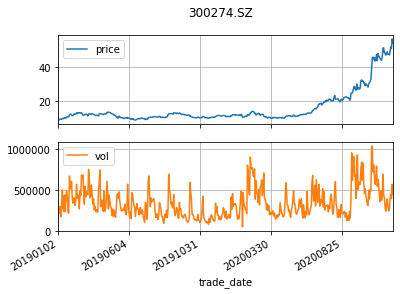

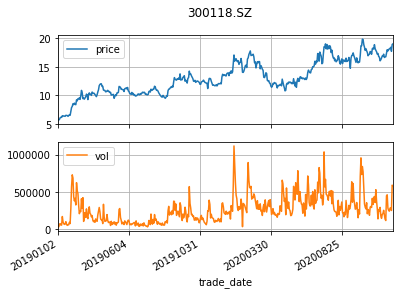

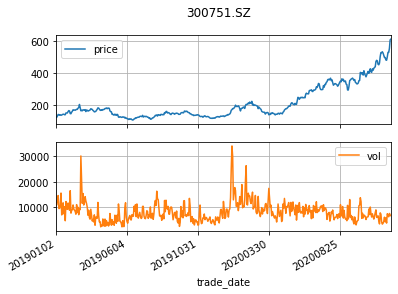

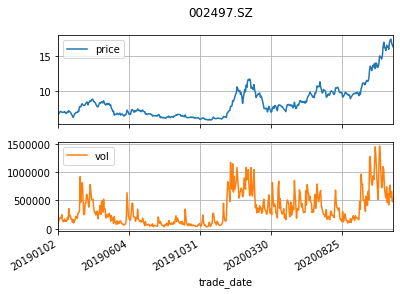

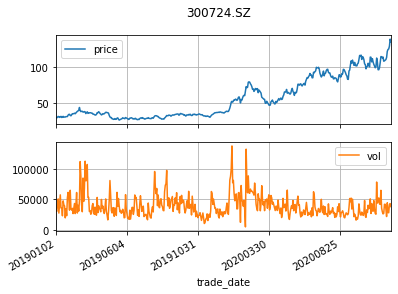

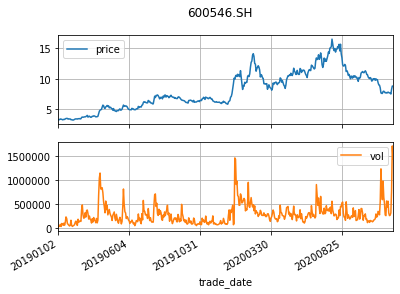

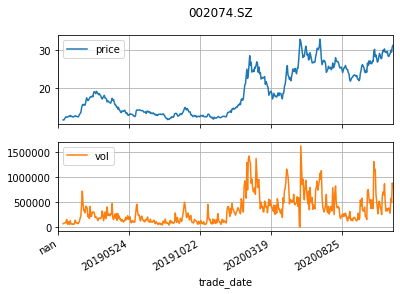

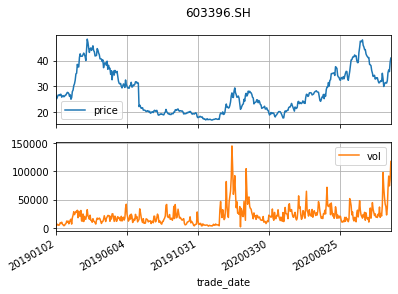

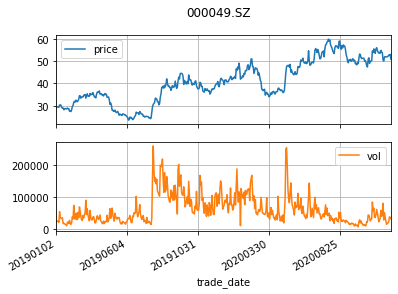

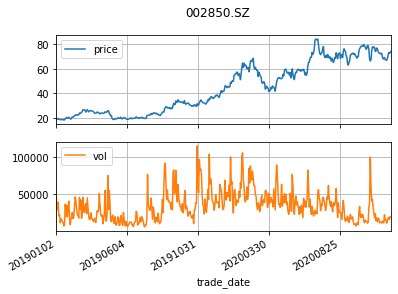

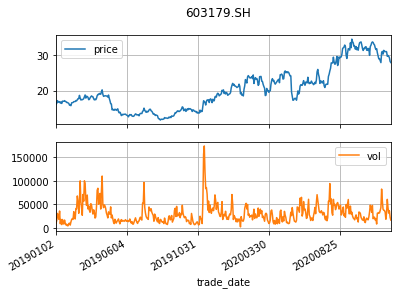

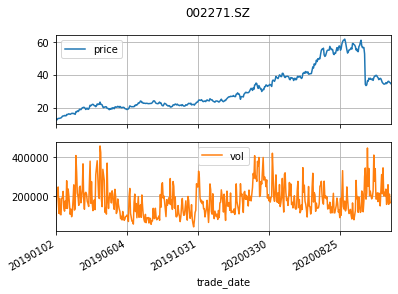

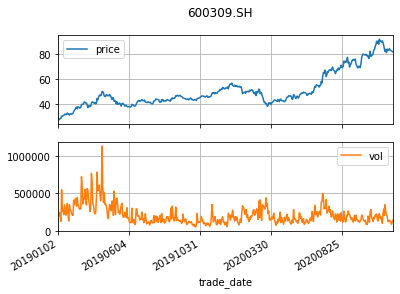

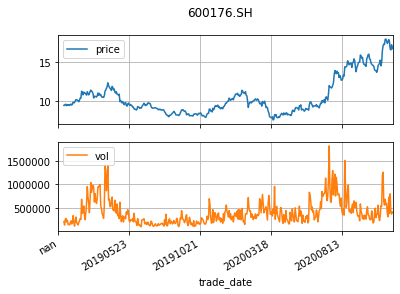

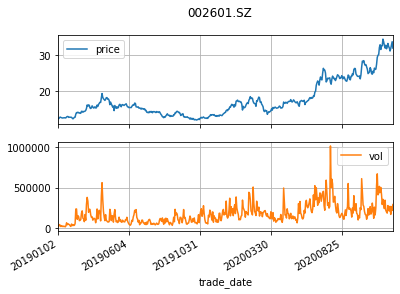

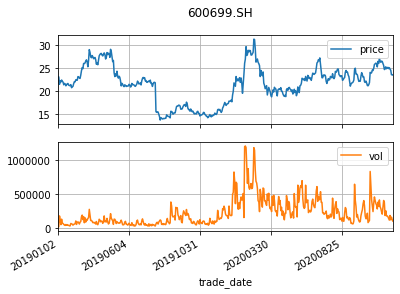

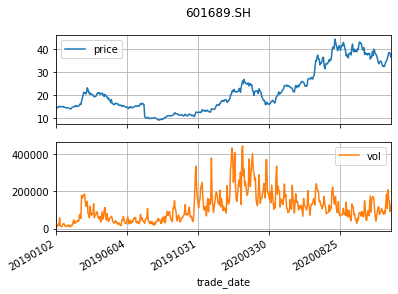

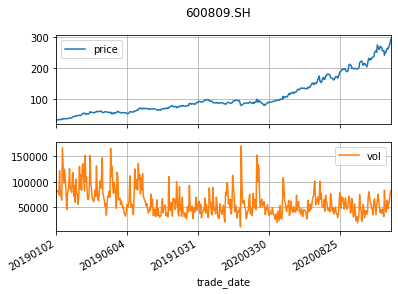

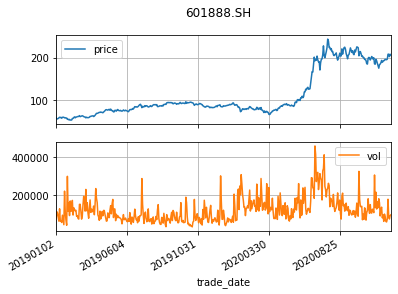

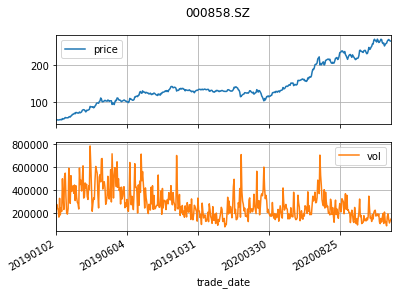

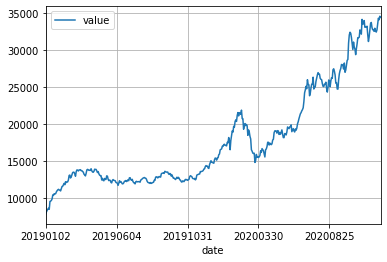

In [71]:
# 假设初始资金有10k，在2018-01-01按比例投入
initial_value = 10000
total = df_loc['次数'].sum()
df_total = pd.DataFrame(columns = ['date', 'value'])
df_total['date'] = df['300750.SZ']['trade_date']

for col in ticker_list:
    df_i = df[col]
    """
    This is the visulization part
    """
    price_list = list(df_i['close'])
    price = pd.Series(price_list, index=df_i['trade_date'])
    std = np.var(list(df_i['close']))/np.average(price_list)
    volume = pd.Series(list(df_i['vol']), index=df_i['trade_date'])
    first2 = pd.concat([price, volume], axis = 1) 
    first2.columns = ['price','vol']
    index = ticker_list.index(col)
    times = list(df_loc['次数'])[index]
    names = list(df_loc['名字'])[index]
    first2.plot(legend = True, subplots = True, grid = True, title = col)
    """
    This is the calculation part
    """
    first_index = df_i.first_valid_index()
    first_price = df_i['close'][first_index]
    first_value = initial_value * times/total
    first_share = first_value/first_price
    df_i['value'] = df_i['close'].apply(lambda x: x*first_share)
    df_total['value'] = df_total['value'].fillna(0) + df_i['value'].fillna(0)
    print(col, std, np.average(price_list))
    
df_total = df_total.set_index('date')
df_total.plot(grid = True)

In [73]:
df_total

,value
date,
20190102,7859.922179
20190103,8125.881011
20190104,8338.864293
20190107,8491.950327
20190108,8639.511219
...,...
20201207,33454.157742
20201208,34277.278322
20201209,34075.810704


In [148]:
#K线图可视化
from pyecharts import Kline
pa.index=pd.to_datetime(pa.trade_date)
pa=pa.sort_index()
v1=list(pa.loc[:,['open','close','low','high']].values)
t=pa.index
v0=list(t.strftime('%Y%m%d'))
kline = Kline("平安银行K线图",title_text_size=15)
kline.add("", v0, v1,is_datazoom_show=True,
         mark_line=["average"],
         mark_point=["max", "min"],
         mark_point_symbolsize=60,
         mark_line_valuedim=['highest', 'lowest'] )
#kline.render("上证指数图.html")
kline

ImportError: cannot import name 'Kline' from 'pyecharts' (/Users/zhangluyang/opt/anaconda3/lib/python3.7/site-packages/pyecharts/__init__.py)

In [ ]:
import yfinance as yf

data = yf.download(ticker_list, start="20200101", end="20201006")

In [38]:
import yfinance as yf

In [52]:
data = yf.download(ticker_list, start="2020-01-01", end="2020-10-06")

[*********************100%***********************]  70 of 70 completed

1 Failed download:
- 300999.SZ: Data doesn't exist for startDate = 1577865600, endDate = 1601967600
